In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from pathlib import Path
from collections import Counter

In [2]:
# Read the CSV file into a Pandas DataFrame
file_path = Path('..\Covid_Comorbidities\Database\Resources\Covid-19\Cleaned_Data\MACHINE_LEARNING_FINAL_STRIPPED.csv')
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,County_name,State,age_group,sex,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,0,Wayne,OH,65+ years,Male,Symptomatic,Yes,No,No,Yes
1,1,Wayne,OH,65+ years,Male,Symptomatic,Yes,No,No,Yes
2,2,Wayne,OH,65+ years,Male,Symptomatic,No,No,Yes,Yes
3,3,Wayne,OH,65+ years,Male,Symptomatic,No,No,No,Yes
4,4,Wayne,OH,65+ years,Male,Symptomatic,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
446683,446683,Orleans,NY,50 to 64 years,Female,Symptomatic,Yes,No,No,Yes
446684,446684,Orleans,NY,18 to 49 years,Female,Symptomatic,Yes,No,No,Yes
446685,446685,Orleans,NY,18 to 49 years,Female,Symptomatic,No,No,No,Yes
446686,446686,Orleans,NY,18 to 49 years,Female,Symptomatic,No,No,No,Yes


In [4]:
df.shape

(446688, 10)

#Exploring the data

In [5]:
# getting rid icu but not hosp bc didnt make sense 
df = df.loc[~((df.icu_yn == 'Yes') & (df.hosp_yn == 'No'))]

In [6]:
# only 7 deaths with no underlying conditions 

df.loc[df.death_yn =='Yes']['underlying_conditions_yn'].value_counts()

Yes    20651
No         7
Name: underlying_conditions_yn, dtype: int64

In [7]:
df['death_yn'].value_counts()

No     425601
Yes     20658
Name: death_yn, dtype: int64

In [8]:
#Remove any Missing/Unknown values
df = df[~df.isin(['Missing', 'Unknown']).any(axis=1)]
df = df.dropna()

In [9]:
#Drop extra columns
df = df.drop(columns = ['Unnamed: 0', 'County_name', 'State'])


In [10]:
df

,age_group,sex,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,65+ years,Male,Symptomatic,Yes,No,No,Yes
1,65+ years,Male,Symptomatic,Yes,No,No,Yes
2,65+ years,Male,Symptomatic,No,No,Yes,Yes
3,65+ years,Male,Symptomatic,No,No,No,Yes
4,65+ years,Male,Symptomatic,No,No,No,Yes
...,...,...,...,...,...,...,...
446683,50 to 64 years,Female,Symptomatic,Yes,No,No,Yes
446684,18 to 49 years,Female,Symptomatic,Yes,No,No,Yes
446685,18 to 49 years,Female,Symptomatic,No,No,No,Yes
446686,18 to 49 years,Female,Symptomatic,No,No,No,Yes


In [11]:
df2 = pd.get_dummies(df, drop_first=True)

In [12]:
df2.columns

Index(['age_group_18 to 49 years', 'age_group_50 to 64 years',
       'age_group_65+ years', 'sex_Male', 'symptom_status_Symptomatic',
       'hosp_yn_Yes', 'icu_yn_Yes', 'death_yn_Yes',
       'underlying_conditions_yn_Yes'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df2.copy()


In [14]:
df2

,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,sex_Male,symptom_status_Symptomatic,hosp_yn_Yes,icu_yn_Yes,death_yn_Yes,underlying_conditions_yn_Yes
0,0,0,1,1,1,1,0,0,1
1,0,0,1,1,1,1,0,0,1
2,0,0,1,1,1,0,0,1,1
3,0,0,1,1,1,0,0,0,1
4,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
446683,0,1,0,0,1,1,0,0,1
446684,1,0,0,0,1,1,0,0,1
446685,1,0,0,0,1,0,0,0,1
446686,1,0,0,0,1,0,0,0,1


In [15]:
# Define the features set.
y = df2["death_yn_Yes"]
#X = df2["underlying_conditions_yn"]
X = df2.drop(columns="death_yn_Yes")
X.head()

,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,sex_Male,symptom_status_Symptomatic,hosp_yn_Yes,icu_yn_Yes,underlying_conditions_yn_Yes
0,0,0,1,1,1,1,0,1
1,0,0,1,1,1,1,0,1
2,0,0,1,1,1,0,0,1
3,0,0,1,1,1,0,0,1
4,0,0,1,1,1,0,0,1


In [16]:
# Define the target set.
y = df2["death_yn_Yes"].values
y[:5]

array([0, 0, 1, 0, 0], dtype=uint8)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Determine the shape of our training and testing sets. 75% 25% split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334693, 8)
(111565, 8)
(334693,)
(111565,)


In [19]:
from sklearn.preprocessing import StandardScaler
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
from sklearn import tree

# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)

In [22]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,104859,1489
Actual 1,3174,2043


In [24]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [25]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,104859,1489
Actual 1,3174,2043


Accuracy Score : 0.9582037377313674
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    106348
           1       0.58      0.39      0.47      5217

    accuracy                           0.96    111565
   macro avg       0.77      0.69      0.72    111565
weighted avg       0.95      0.96      0.95    111565



In [26]:
importance = model.feature_importances_

In [27]:
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.6153745890985047, 'icu_yn_Yes'),
 (0.2522650573740803, 'age_group_65+ years'),
 (0.10725705838196527, 'hosp_yn_Yes'),
 (0.011941289080721057, 'age_group_50 to 64 years'),
 (0.008648838470090807, 'sex_Male'),
 (0.0026495972372046228, 'symptom_status_Symptomatic'),
 (0.0012900890373031876, 'underlying_conditions_yn_Yes'),
 (0.0005734813201301585, 'age_group_18 to 49 years')]

In [28]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00057
Feature: 1, Score: 0.01194
Feature: 2, Score: 0.25227
Feature: 3, Score: 0.00865
Feature: 4, Score: 0.00265
Feature: 5, Score: 0.10726
Feature: 6, Score: 0.61537
Feature: 7, Score: 0.00129


rebalancing the dataset and rerunning results

In [29]:
#Rebalance data with SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)


In [30]:
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[104825,   1523],
       [  3147,   2070]], dtype=int64)

In [33]:
# Calculating the confusion matrix
cmrb = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_rb_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_rb_df

,Predicted 0,Predicted 1
Actual 0,104859,1489
Actual 1,3174,2043


In [34]:
from sklearn.metrics import balanced_accuracy_score
balac = balanced_accuracy_score(y_test, y_pred)
balac

0.6912294248835503

In [35]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.40      0.98      0.63      0.41    106348
          1       0.58      0.40      0.99      0.47      0.63      0.37      5217

avg / total       0.95      0.96      0.42      0.95      0.63      0.41    111565



In [36]:
# Displaying results
print("Confusion Matrix - Rebalanced")
display(cm_rb_df)
print(f"Accuracy Score : {balac}")
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Confusion Matrix - Rebalanced


,Predicted 0,Predicted 1
Actual 0,104859,1489
Actual 1,3174,2043


Accuracy Score : 0.6912294248835503
Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.40      0.98      0.63      0.41    106348
          1       0.58      0.40      0.99      0.47      0.63      0.37      5217

avg / total       0.95      0.96      0.42      0.95      0.63      0.41    111565



<AxesSubplot:>

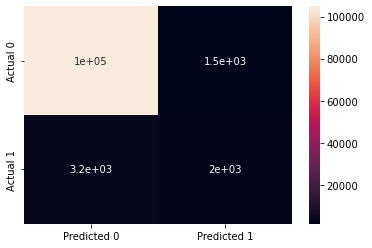

In [37]:
import seaborn as sns
sns.heatmap(cm_rb_df, annot=True)

<AxesSubplot:>

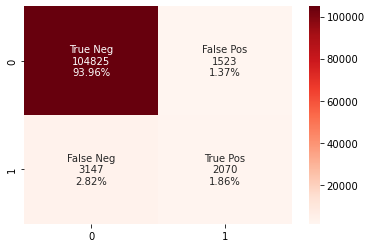

In [46]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmrb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmrb.flatten()/np.sum(cmrb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmrb, annot=labels, fmt='', cmap='Reds')